In [1]:
def derivative(data):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MultipleLocator
    
    # Load the data
    data = pd.read_csv(data)
    
    # Drop rows with NaN values in 'Defect Percent' or 'Hlimit'
    data = data.dropna(subset=['Defect Percent', 'Hlimit'])
    
    # Sort the data by 'ID' and 'Hlimit' to ensure proper grouping and ordering
    data = data.sort_values(by=['ID', 'Hlimit'])
    
    # Initialize a dictionary to store the derivatives and their averages
    derivatives = {}
    average_derivatives = {}
    
    # Iterate over each unique ID
    for id in data['ID'].unique():
        # Filter data for the current ID
        id_data = data[data['ID'] == id]
        
        # Calculate the differences in 'Defect Percent' and 'Hlimit'
        defect_diff = id_data['Defect Percent'].diff().dropna()
        hlimit_diff = id_data['Hlimit'].diff().dropna()
        
        # Calculate the derivative (finite difference)
        derivative = defect_diff / hlimit_diff
        
        # Store the derivative in the dictionary
        derivatives[id] = derivative.values
        
        # Calculate the average derivative for the current ID
        average_derivatives[id] = np.mean(derivative)
    
    # Sort the IDs based on the average derivative values
    sorted_ids = sorted(average_derivatives.keys(), key=lambda x: average_derivatives[x])
    
    # Print the sorted IDs and their average derivatives
    print("Sorted IDs based on average derivative:")
    for id in sorted_ids:
        print(f"ID: {id}, Average Derivative: {average_derivatives[id]:.4f}")
    
    # Convert the derivatives dictionary to a DataFrame for better visualization
    derivative_df = pd.DataFrame.from_dict(derivatives, orient='index').transpose()
    
    # Print the derivative DataFrame
    print("\nDerivative DataFrame:")
    print(derivative_df)
    
    # Find the ID with the maximum and minimum average derivative
    max_id = max(average_derivatives, key=average_derivatives.get)
    min_id = min(average_derivatives, key=average_derivatives.get)
    
    # Get the corresponding average derivative values
    max_avg_derivative = average_derivatives[max_id]
    min_avg_derivative = average_derivatives[min_id]
    
    # Retrieve all data for max_id
    max_id_data = data[data['ID'] == max_id]
    
    # Find the minimum Hlimit value for max_id
    min_hlimit = max_id_data['Hlimit'].min()
    
    # Filter records for max_id with the minimum Hlimit
    max_id_min_hlimit_data = max_id_data[max_id_data['Hlimit'] == min_hlimit]
    
    # Extract Hlimit and Defect Percent for max_id
    hlimit_max_id = max_id_min_hlimit_data['Hlimit'].values[0]  # Get the first value (if multiple)
    defect_percent_max_id = max_id_min_hlimit_data['Defect Percent'].values[0]  # Get the first value
    
    # Print values for max_id
    print(f"\nID of Maximum Derivertive: {max_id}")
    print(f"Hlimit: {hlimit_max_id}")
    print(f"Defect Percent: {defect_percent_max_id}")
    
    # Plot the line chart for each ID
    plt.figure(figsize=(10, 6))
    for id in data['ID'].unique():
        id_data = data[data['ID'] == id]
        plt.plot(id_data['Hlimit'], id_data['Defect Percent'], label=f'ID {id}')
    
    # Add grid lines to both X and Y axes
    plt.grid(True)

    # Set custom grid step size
    #plt.gca().xaxis.set_major_locator(MultipleLocator(2))
    plt.gca().yaxis.set_major_locator(MultipleLocator(2))
    
    # Set the chart title dynamically
    plt.title(f"Defect Area and ScoreMax Limit Relationship {max_id} and {min_id}")
    
    # Set axis labels
    plt.xlabel('Hlimit')
    plt.ylabel('Defect Percent')
    
    # Remove the legend (labels)
    plt.legend().set_visible(False)
    
    # Show the plot
    plt.show()
    
    # Return the results
    return {
        'max_id': max_id,
        'hlimit_max_id': hlimit_max_id,  # Hlimit for max_id
        'defect_percent_max_id': defect_percent_max_id,  # Defect Percent for max_id
        'max_avg_derivative': max_avg_derivative,
        'min_id': min_id,
        'min_avg_derivative': min_avg_derivative,
        'max_id_min_hlimit_data': max_id_min_hlimit_data  # Return data for max_id with min Hlimit
    }

# Example usage:
# result = derivative('your_data.csv')
# print(result)

Sorted IDs based on average derivative:
ID: 6_1, Average Derivative: -0.2046
ID: 16_1, Average Derivative: -0.1915
ID: 10_1, Average Derivative: -0.1881
ID: 0_1, Average Derivative: -0.1872
ID: 7_1, Average Derivative: -0.1520
ID: 20_1, Average Derivative: -0.1351
ID: 1_1, Average Derivative: -0.1312
ID: 21_1, Average Derivative: -0.1311
ID: 13_1, Average Derivative: -0.1254
ID: 2_1, Average Derivative: -0.1231
ID: 14_1, Average Derivative: -0.1161
ID: 9_1, Average Derivative: -0.1150
ID: 11_1, Average Derivative: -0.1115
ID: 19_1, Average Derivative: -0.1066
ID: 5_1, Average Derivative: -0.0955
ID: 17_1, Average Derivative: -0.0945
ID: 12_1, Average Derivative: -0.0913
ID: 15_1, Average Derivative: -0.0846
ID: 8_1, Average Derivative: -0.0759
ID: 4_1, Average Derivative: -0.0726
ID: 18_1, Average Derivative: -0.0707
ID: 3_1, Average Derivative: -0.0180

Derivative DataFrame:
        0_1      10_1      11_1      12_1      13_1      14_1      15_1  \
0 -0.383333 -0.336667 -0.310667 -0.1

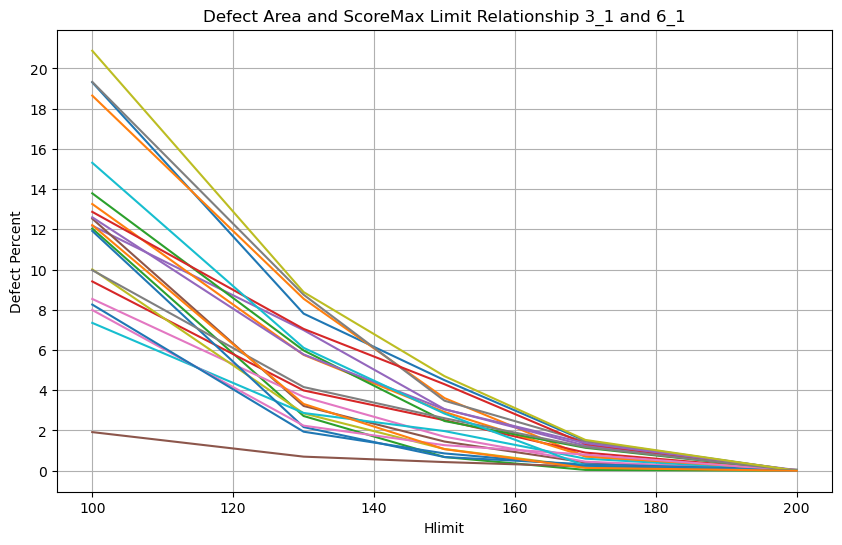

In [2]:
if __name__ == "__main__":
    result = derivative('IBGA Anomaly Individual all.csv')
    

In [3]:
print("Recommend Anomaly Limit Setting (+0.0/-0.5%)" )
print("Score Max: ",result['hlimit_max_id']," %_Defect : ",result['defect_percent_max_id'])

Recommend Anomaly Limit Setting (+0.0/-0.5%)
Score Max:  100.0  %_Defect :  1.92
